## Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [ ]:
%pip install -U kaleido
# Библиотека для ренера графиков

In [43]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [44]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

#### 1.1. Разбейте данные на обучение и тест

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Создайте архитектуру для этой задачи

In [46]:
from keras.layers import Dense
from keras.models import Sequential


model = Sequential([
    Dense(4, input_shape=(8,), activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [47]:
from keras.optimizers import SGD
INIT_LR = 0.01
opt = SGD(learning_rate=INIT_LR)
model.compile(optimizer=opt, loss='mse', metrics='mae')

#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [48]:
%%time
EPOCHS = 200
H = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=1000, validation_data=(X_test, Y_test))

Epoch 1/200
17/17 [==============================] - 1s 14ms/step - loss: 192.8748 - mae: 3.8488 - val_loss: 1.9653 - val_mae: 1.0018
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 1.8529 - mae: 0.9716 - val_loss: 1.6276 - val_mae: 0.9128
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 1.5970 - mae: 0.9094 - val_loss: 1.4622 - val_mae: 0.8810
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 1.4681 - mae: 0.8889 - val_loss: 1.3806 - val_mae: 0.8752
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 1.4040 - mae: 0.8863 - val_loss: 1.3405 - val_mae: 0.8779
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 1.3715 - mae: 0.8889 - val_loss: 1.3208 - val_mae: 0.8834
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 1.3550 - mae: 0.8940 - val_loss: 1.3113 - val_mae: 0.8890
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 1.3467 

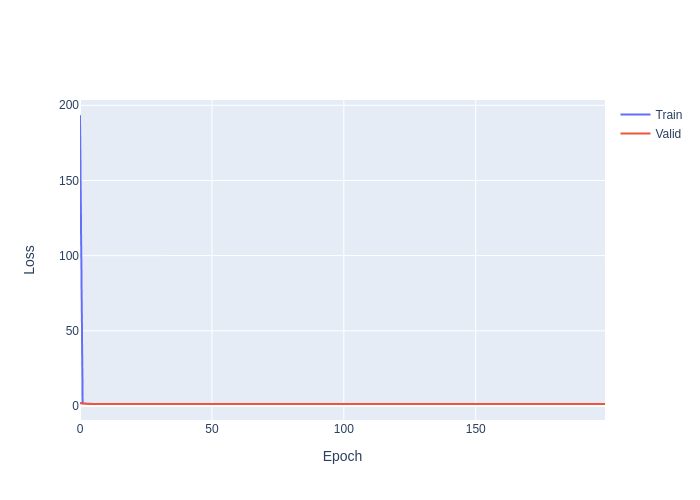

In [49]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import kaleido

pio.renderers.default = "png" # colab для интерактивного отображения в google colab

fig = go.Figure()

fig.add_trace(go.Scattergl(y=H.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=H.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

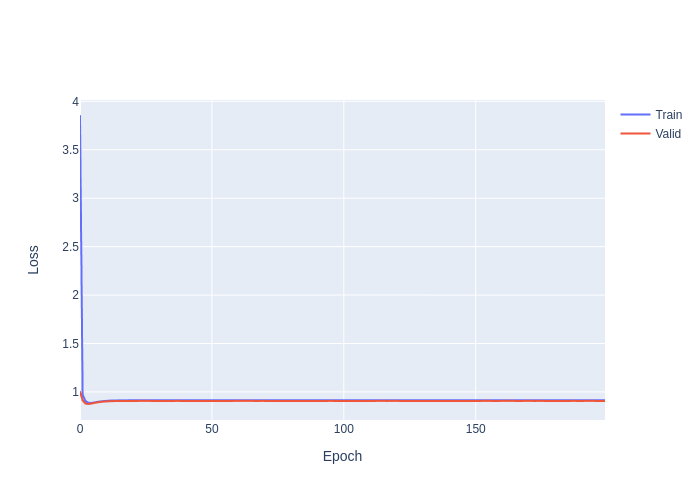

In [50]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=H.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=H.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

In [51]:
from sklearn.metrics import mean_absolute_error
Y_predict = model.predict(X_test)
print(f'Средняя ошибка: ${int(mean_absolute_error(Y_predict, Y_test)*100000)}')

129/129 [==============================] - 0s 1ms/step
Средняя ошибка: $90715


#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Модель обучается плохо, так как даныне не нормализованны, нормализуем данные, а также добавим дополнительные слои.

In [52]:
from sklearn.preprocessing import MinMaxScaler


model = Sequential([
    Dense(256, input_shape=(8,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Нормализуем данные
mms = MinMaxScaler()
X_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

INIT_LR = 0.01
opt = SGD(learning_rate=INIT_LR)
model.compile(optimizer=opt, loss='mse', metrics='mae')

In [53]:
%%time
EPOCHS = 250
H = model.fit(X_norm, Y_train, epochs=EPOCHS, batch_size=1000, validation_data=(X_test_norm, Y_test))

Epoch 1/250
17/17 [==============================] - 1s 14ms/step - loss: 2.4877 - mae: 1.1826 - val_loss: 1.2650 - val_mae: 0.8790
Epoch 2/250
17/17 [==============================] - 0s 9ms/step - loss: 1.2686 - mae: 0.8898 - val_loss: 1.2203 - val_mae: 0.8816
Epoch 3/250
17/17 [==============================] - 0s 8ms/step - loss: 1.2267 - mae: 0.8798 - val_loss: 1.1840 - val_mae: 0.8681
Epoch 4/250
17/17 [==============================] - 0s 9ms/step - loss: 1.1869 - mae: 0.8666 - val_loss: 1.1439 - val_mae: 0.8510
Epoch 5/250
17/17 [==============================] - 0s 9ms/step - loss: 1.1446 - mae: 0.8504 - val_loss: 1.1050 - val_mae: 0.8407
Epoch 6/250
17/17 [==============================] - 0s 9ms/step - loss: 1.1019 - mae: 0.8353 - val_loss: 1.0634 - val_mae: 0.8239
Epoch 7/250
17/17 [==============================] - 0s 9ms/step - loss: 1.0569 - mae: 0.8183 - val_loss: 1.0207 - val_mae: 0.8030
Epoch 8/250
17/17 [==============================] - 0s 9ms/step - loss: 1.0112 - 

#### 1.6. Сделайте предсказания на тестовых данных

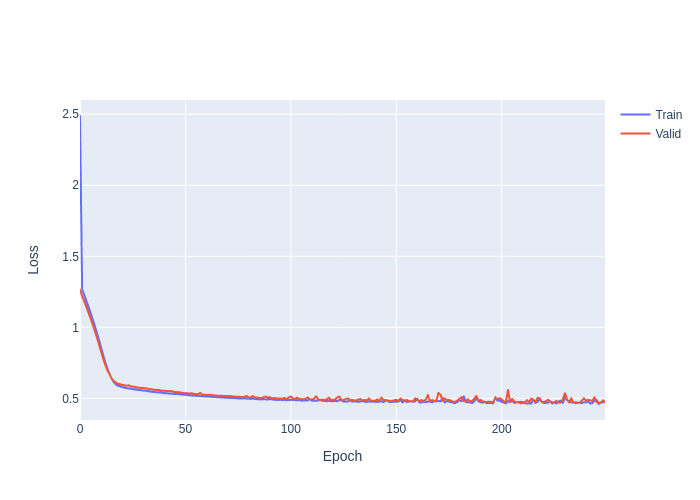

In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=H.history['loss'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=H.history['val_loss'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

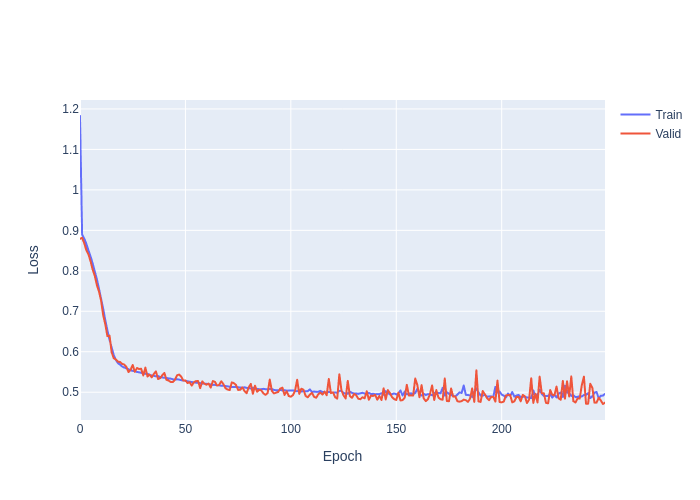

In [55]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=H.history['mae'],
                    name='Train'))

fig.add_trace(go.Scattergl(y=H.history['val_mae'],
                    name='Valid'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

fig.show()

#### 1.7. Посчитайте метрику качества на тестовых данных

In [56]:
from sklearn.metrics import mean_absolute_error
Y_predict = model.predict(X_test_norm)
print(f'Средняя ошибка: ${int(mean_absolute_error(Y_predict, Y_test)*100000)}')

129/129 [==============================] - 0s 1ms/step
Средняя ошибка: $47417


Как видно, нормализовав данные и изменив модель нейросети, удалось снизить ошибку почти в два раза.